<a href="https://colab.research.google.com/github/sindhutej-6/dl_programs/blob/main/9_inte_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000, Test samples: 25000
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 127ms/step - accuracy: 0.4964 - loss: 0.6993 - val_accuracy: 0.5062 - val_loss: 0.6986
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 118ms/step - accuracy: 0.5043 - loss: 0.6946 - val_accuracy: 0.4978 - val_loss: 0.6942
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.5482 - loss: 0.6855 - val_accuracy: 0.5128 - val_loss: 0.6982
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.5844 - loss: 0.6482 - val_accuracy: 0.5128 - val_loss: 0.7114
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.6019 - loss: 0.6192 - val_accuracy: 0.5174 - val_loss: 0.7077
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 119ms/step - accuracy: 0.6250 - loss: 0.5954 - val_accuracy: 0.5120 - val_loss: 0.7433
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.6513 - loss: 0.5518 - val_accuracy: 0.5304 - val_loss: 0.7745
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.6676 - loss: 0.5195 - val

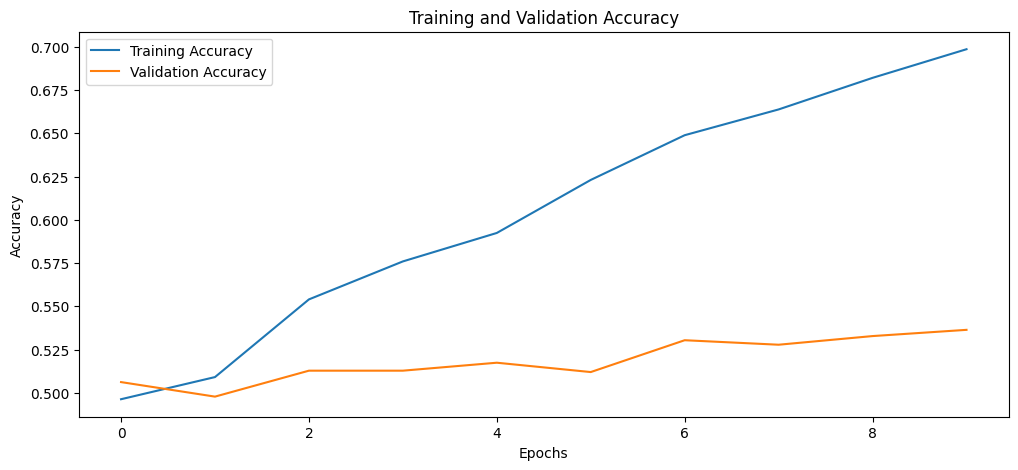

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step

Actual: Negative
Predicted by Model: Positive


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load IMDB dataset
num_words = 10000  # top 10k most frequent words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print(f"Training samples: {len(x_train)}, Test samples: {len(x_test)}")

# Step 2: Pad sequences to the same length
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post', truncating='post')

# Step 3: Build the RNN model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    SimpleRNN(128),
    Dense(1, activation='sigmoid')  # binary classification
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Step 7: Plot training progress
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 8: Predict a sample and display Positive/Negative
index = 0  # choose a sample index
sample_review = np.expand_dims(x_test[index], axis=0)
true_sentiment_label = y_test[index]

prediction_probability = model.predict(sample_review)[0][0]
predicted_sentiment = "Positive" if prediction_probability > 0.5 else "Negative"
true_sentiment = "Positive" if true_sentiment_label == 1 else "Negative"

print(f"\nActual: {true_sentiment}")
print(f"Predicted by Model: {predicted_sentiment}")
